In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam_ham_dataset.csv", encoding = "latin-1")

In [3]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,ham,Subject: put the 10 on the ft\r\nthe transport...
10739,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
10740,ham,Subject: calpine daily gas nomination\r\n>\r\n...
10741,ham,Subject: industrial worksheets for august 2000...


In [4]:
df.shape

(10743, 2)

# **Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10743 entries, 0 to 10742
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      10743 non-null  object
 1   v2      10743 non-null  object
dtypes: object(2)
memory usage: 168.0+ KB


In [6]:
# column 2, 3, 4 has to many null values so we should drop those first
df = df.drop(df.iloc[:, 2:], axis=1)

In [7]:
df.sample(5)
# we removed last 3 columns which not adding the value in model

,v1,v2
6418,spam,Subject: capsize\r\nlooking for the perfect gi...
2944,ham,"Hey babe, sorry i didn't get sooner. Gary can ..."
413,ham,Bring home some Wendy =D
8861,spam,"Subject: cheap v . iagra , phentermine , xa . ..."
6460,ham,Subject: republic royalty 5 / 00\r\nthis deal ...


In [8]:
# Column name is not according to the colums so we renaming it
df.rename(columns = {
    'v1' : 'target',
    'v2' : 'text'
}, inplace = True)

In [9]:
df.sample(5) # renamed

,target,text
3757,ham,Lol no ouch but wish i'd stayed out a bit longer
9751,ham,Subject: potential list for november\r\ndaren ...
8498,ham,Subject: re : first delivery - helmerich & pay...
2144,spam,FreeMsg: Hey - I'm Buffy. 25 and love to satis...
5287,ham,Hey ! Don't forget ... You are MINE ... For ME...


In [10]:
# replacing ham : 0 & apam : 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.sample(5) # Changes are done

,target,text
3483,0,Tell my bad character which u Dnt lik in me. ...
7750,0,Subject: eol application id and password\r\nda...
388,1,4mths half price Orange line rental & latest c...
4637,0,Captain vijaykanth is doing comedy in captain ...
8433,0,Subject: seac / hpl - freeport meter # 98 - 04...


In [12]:
# Checking for the missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [13]:
# Checking for the duplicate values
df.duplicated().sum()

np.int64(581)

In [14]:
# Remove the duplicate values
df = df.drop_duplicates(keep = 'first')

In [15]:
# Checking for the duplicate values
df.duplicated().sum() # We removed the duplicated values

np.int64(0)

In [16]:
df.shape

(10162, 2)

## **EDA**

In [17]:
df['target'].value_counts() # ) : not spam & 1 : spam

target
0    8047
1    2115
Name: count, dtype: int64

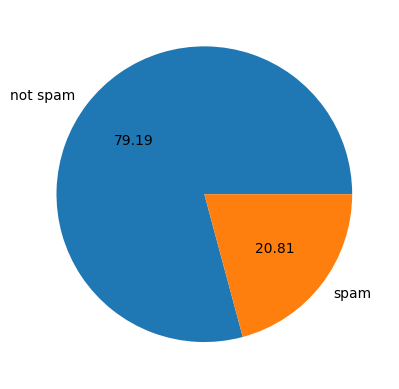

In [18]:
import matplotlib.pyplot as plt # Graphical representation of the spam and not spam
plt.pie(df['target'].value_counts(), labels = ['not spam', 'spam'], autopct = '%0.2f')
plt.show()

Data showing imbalance because spam is to low and not spam is to high so it might baised with not spam  

In [19]:
!pip install nltk

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Finding the lenght of the message
df = df.copy()
df['num_characters'] = df['text'].apply(len)

In [22]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
10737,0,"Subject: fw : crosstex energy , driscoll ranch...",869
10738,0,Subject: put the 10 on the ft\r\nthe transport...,534
10739,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114
10741,0,Subject: industrial worksheets for august 2000...,573


In [23]:
# Finding the number of words in message

nltk.download('punkt_tab')
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\admi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [24]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
10737,0,"Subject: fw : crosstex energy , driscoll ranch...",869,197
10738,0,Subject: put the 10 on the ft\r\nthe transport...,534,156
10739,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114,306
10741,0,Subject: industrial worksheets for august 2000...,573,112


In [25]:
# Finding the number of sentences

df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [26]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10162.000000,10162.000000,10162.000000
mean,565.731451,124.203700,7.577839
std,1193.273065,262.099732,20.438681
min,2.000000,1.000000,1.000000
25%,56.000000,14.000000,1.000000
50%,143.500000,31.000000,3.000000
75%,540.000000,122.000000,7.000000
max,32258.000000,8863.000000,1204.000000


In [27]:
# Ham messege
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,8047.000000,8047.000000,8047.000000
mean,476.183919,110.759662,6.138934
std,1037.088919,247.282194,17.504968
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,107.000000,26.000000,2.000000
75%,433.500000,104.000000,6.000000
max,32258.000000,8863.000000,1204.000000


In [28]:
# Spam message
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2115.000000,2115.00000,2115.000000
mean,906.435461,175.35461,13.052482
std,1613.612372,306.83937,28.350382
min,11.000000,2.00000,1.000000
25%,151.000000,29.00000,3.000000
50%,331.000000,67.00000,5.000000
75%,863.500000,174.00000,13.000000
max,22073.000000,3963.00000,693.000000


In [29]:
import seaborn as sns

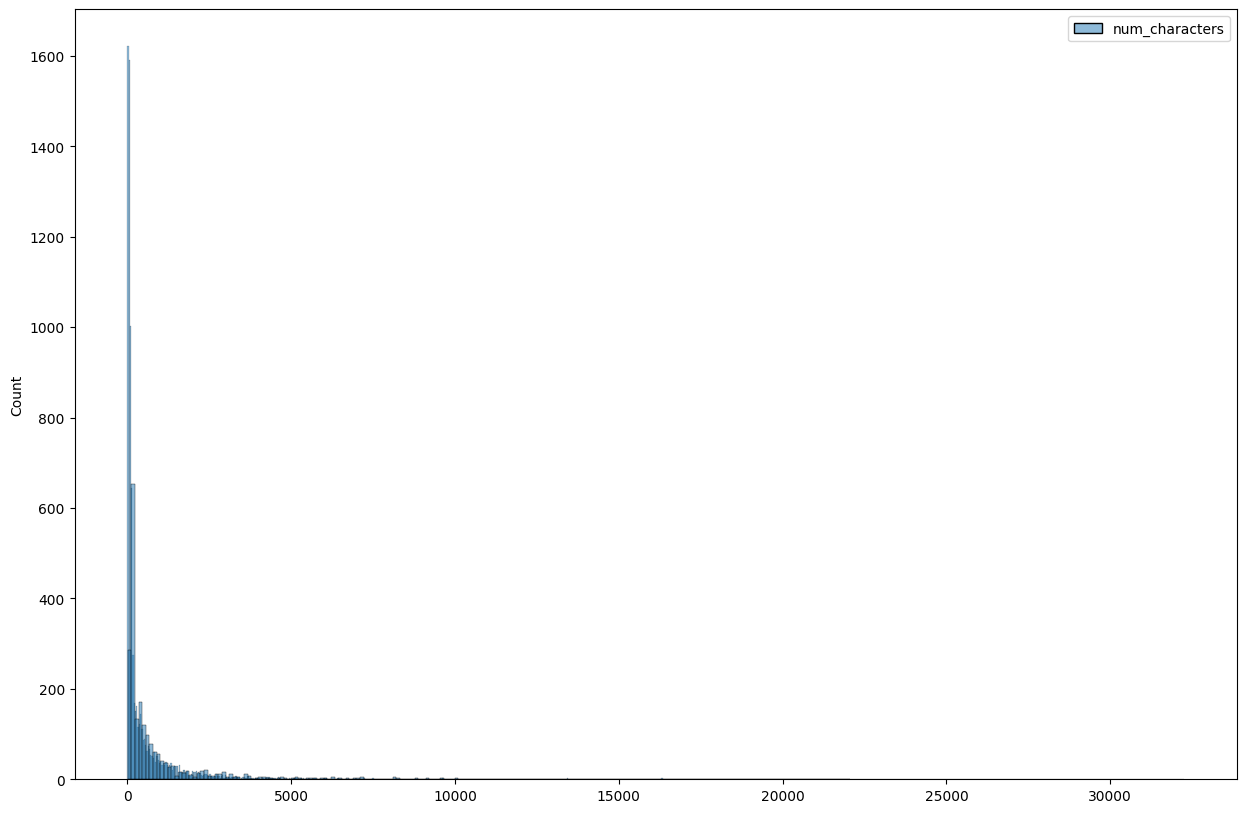

In [30]:
plt.figure(figsize = (15, 10))
sns.histplot(df[df['target'] == 0][['num_characters']], color='blue')
sns.histplot(df[df['target'] == 1][['num_characters']], color = 'red')
plt.show()

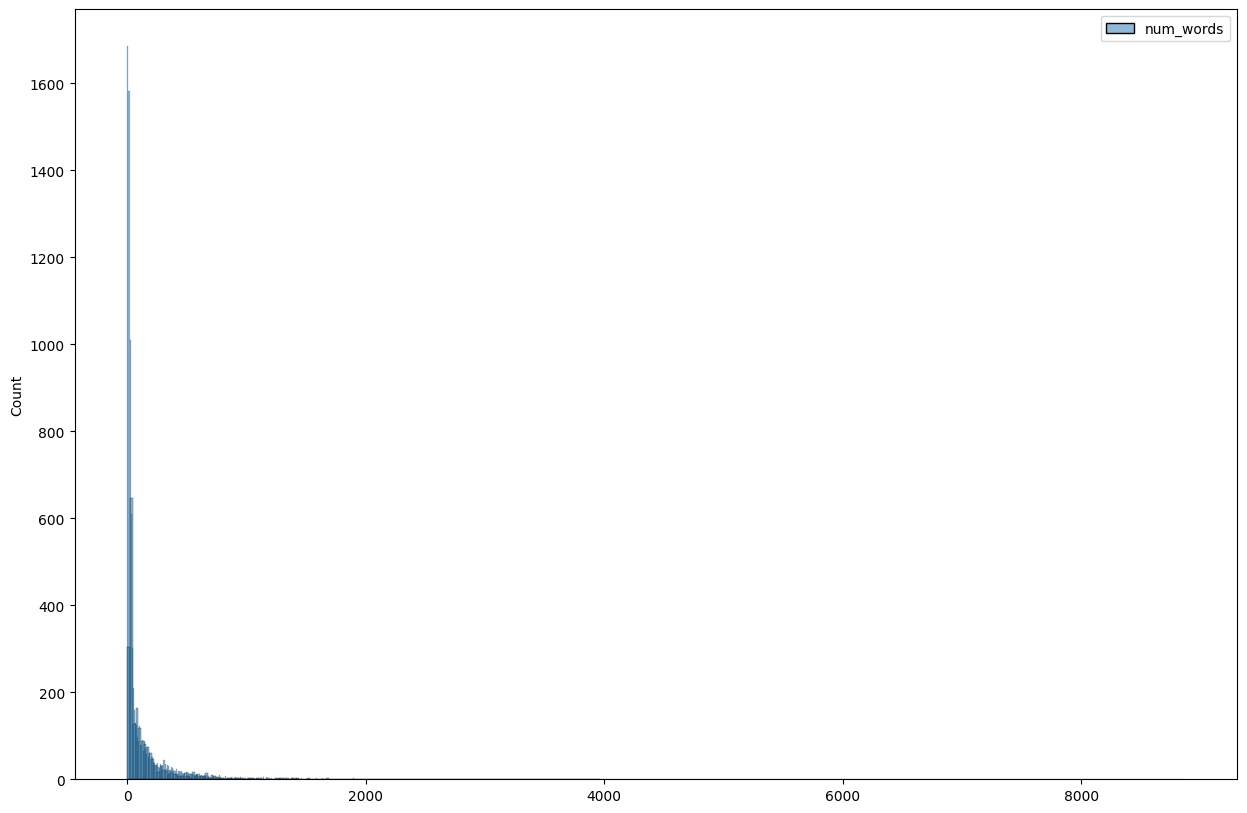

In [31]:
plt.figure(figsize = (15, 10))
sns.histplot(df[df['target'] == 0][['num_words']], color='blue')
sns.histplot(df[df['target'] == 1][['num_words']], color = 'red')
plt.show()

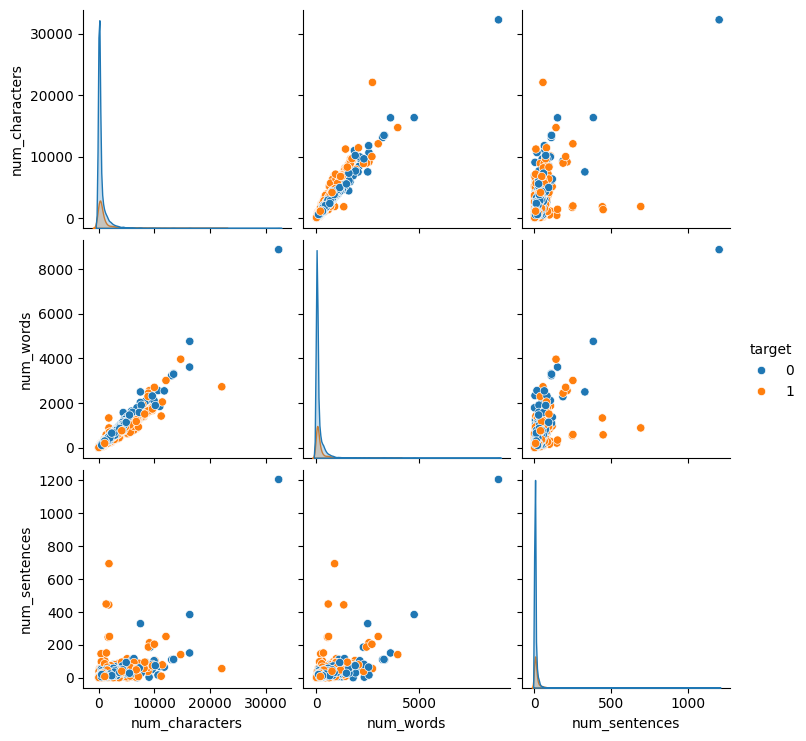

In [32]:
sns.pairplot(df, hue = 'target')

<Axes: >

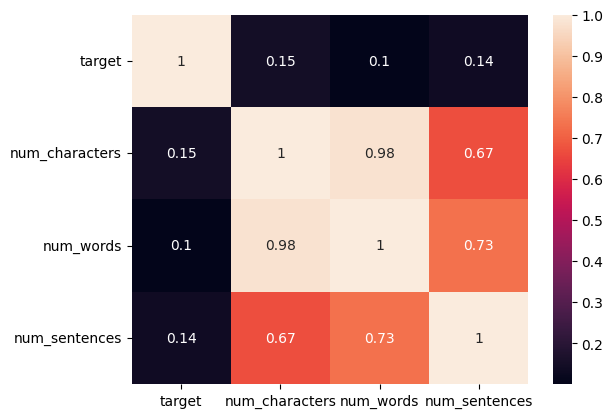

In [33]:
sns.heatmap(df.drop(columns='text').corr(), annot = True)

# **Data Preprocessing**

In [34]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    # Removing special characters
    cleaned_tokens = [word for word in tokens if word.isalnum()]

    # Removing stopwords
    cleaned_tokens = [word for word in cleaned_tokens if word not in stopwords.words('english')]

    # Stemming
    ps = PorterStemmer()
    cleaned_tokens = [ps.stem(word) for word in cleaned_tokens]

    return " ".join(cleaned_tokens)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
10737,0,"Subject: fw : crosstex energy , driscoll ranch...",869,197,9,subject fw crosstex energi driscol ranch 1 3 m...
10738,0,Subject: put the 10 on the ft\r\nthe transport...,534,156,7,subject put 10 ft transport volum decreas 2500...
10739,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114,306,13,subject 3 4 2000 follow nom hpl take extra 15 ...
10741,0,Subject: industrial worksheets for august 2000...,573,112,20,subject industri worksheet august 2000 activ a...


In [37]:
from wordcloud import WordCloud

In [38]:
wc = WordCloud(width = 800, height = 800, min_font_size = 10, background_color = 'white')

In [39]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

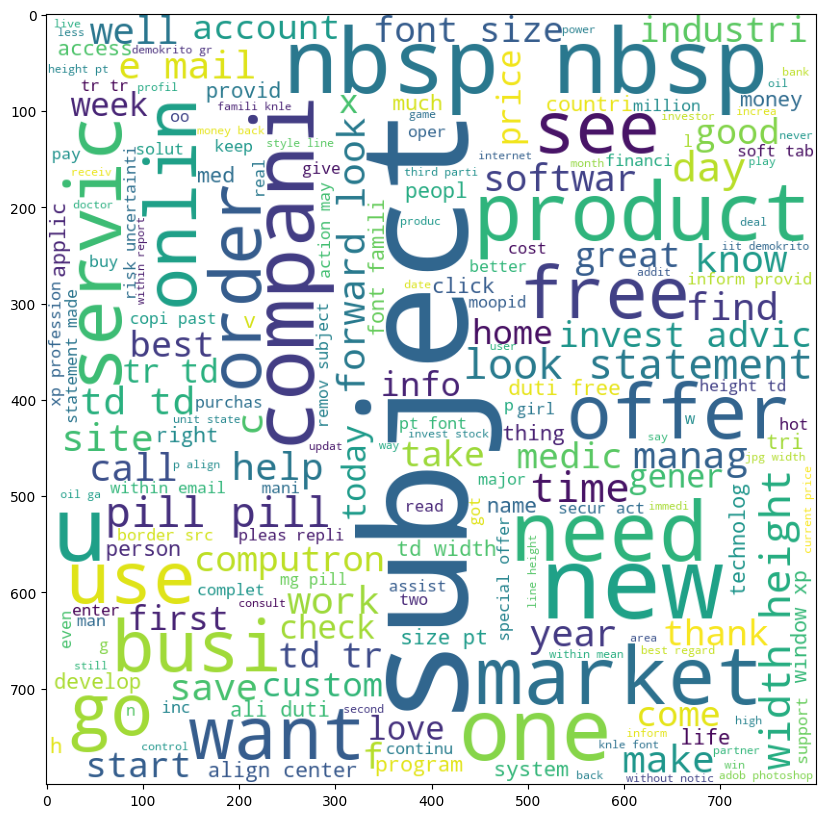

In [40]:
plt.figure(figsize = (15, 10))
plt.imshow(spam_wc)

In [41]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

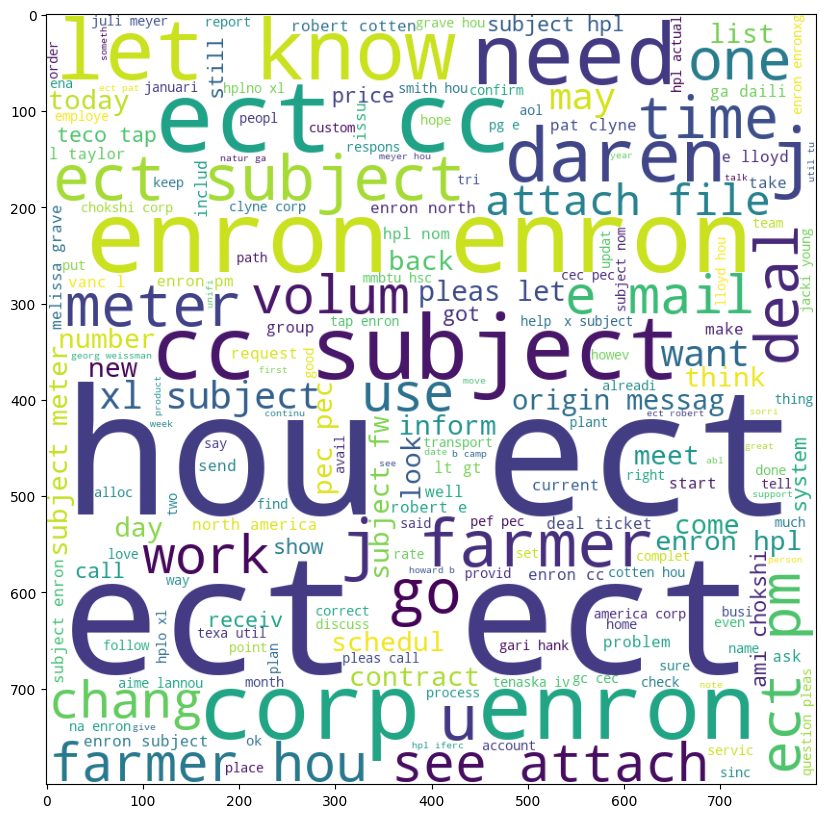

In [42]:
plt.figure(figsize = (15, 10))
plt.imshow(ham_wc)

In [43]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        if word not in spam_corpus:
            spam_corpus.append(word)

C:\Users\admi\AppData\Local\Temp\ipykernel_8320\800769929.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['Word'], y=df1['Frequency'], palette="Blues_r")


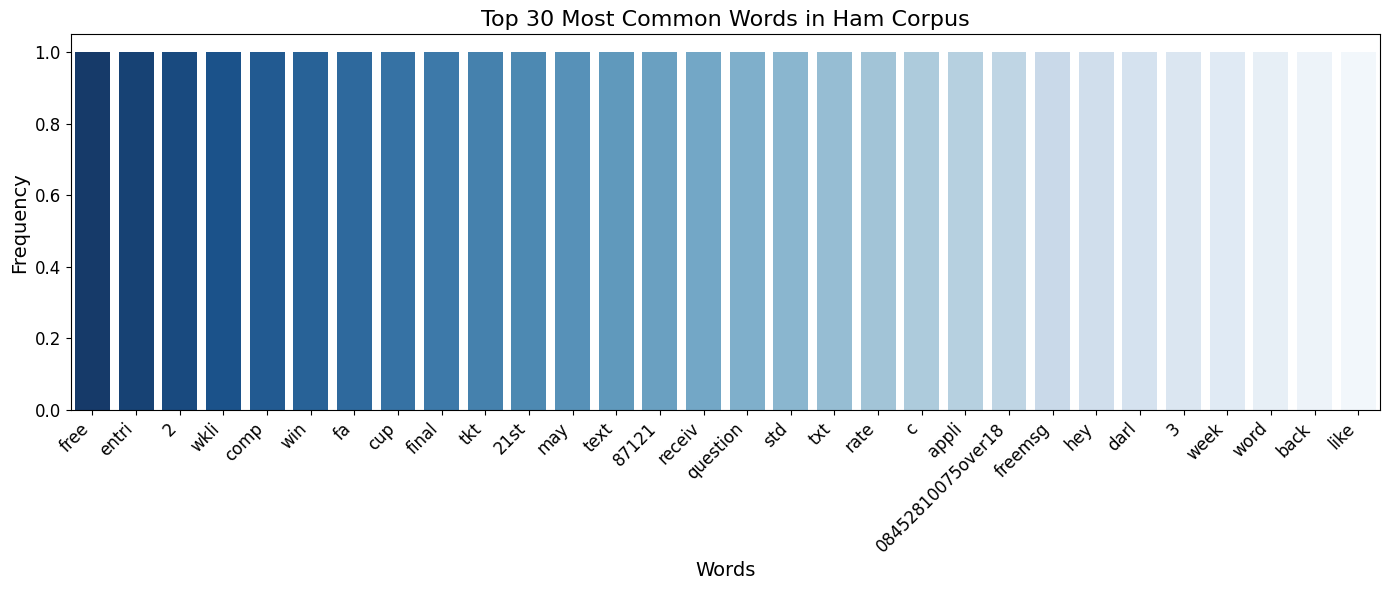

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Get the 30 most common words and their counts
common_words = Counter(spam_corpus).most_common(30)
df1 = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Set figure size for better readability
plt.figure(figsize=(14, 6), dpi=100)

# Create a barplot with improved aesthetics
sns.barplot(x=df1['Word'], y=df1['Frequency'], palette="Blues_r")

# Improve axis labels and title
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Top 30 Most Common Words in Ham Corpus", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


In [45]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [46]:
len(ham_corpus)

415780

C:\Users\admi\AppData\Local\Temp\ipykernel_8320\992707302.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df2['Word'], y=df2['Frequency'], palette="Blues_r")


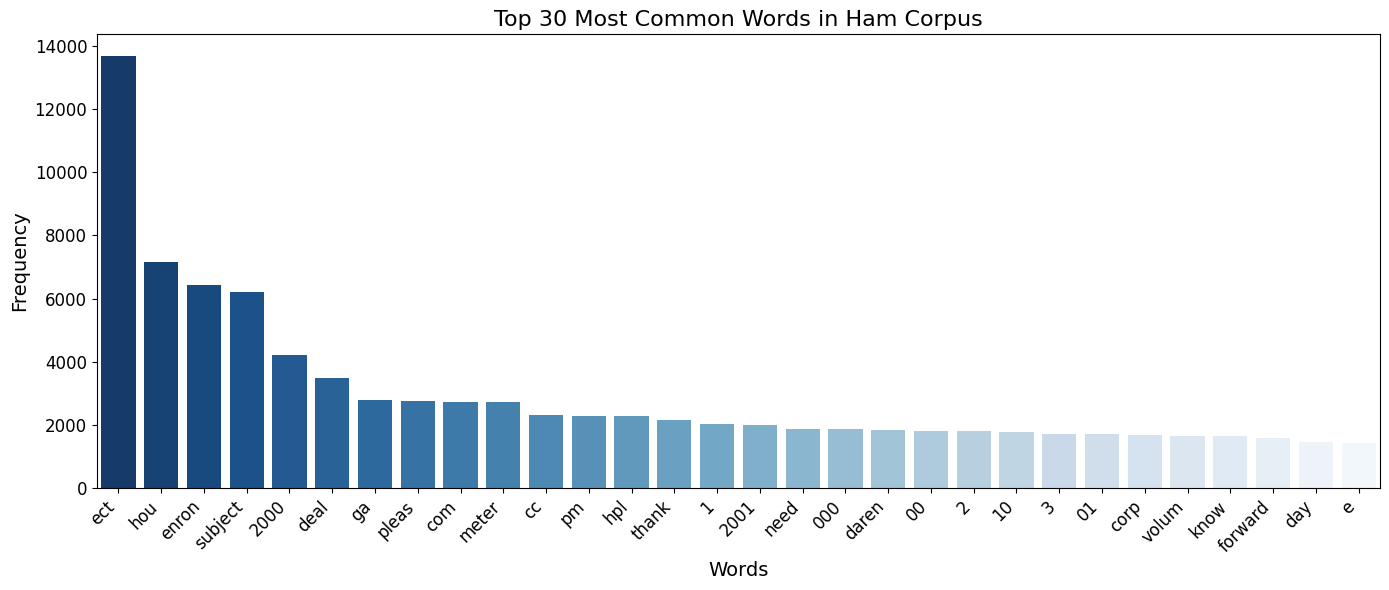

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Get the 30 most common words and their counts
common_words = Counter(ham_corpus).most_common(30)
df2 = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Set figure size for better readability
plt.figure(figsize=(14, 6), dpi=100)

# Create a barplot with improved aesthetics
sns.barplot(x=df2['Word'], y=df2['Frequency'], palette="Blues_r")

# Improve axis labels and title
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Top 30 Most Common Words in Ham Corpus", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


# **Model Building**

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [49]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
x.shape

(10162, 3000)

In [51]:
y = df['target'].values

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print("Accuracy Score for GNB : ", accuracy_score(y_test, y_pred1))
print("Confusion Matrix for GNB : ", confusion_matrix(y_test, y_pred1))
print("Precision Score for GNB : ", precision_score(y_test, y_pred1))

Accuracy Score for GNB :  0.7319232661091982
Confusion Matrix for GNB :  [[1100  524]
 [  21  388]]
Precision Score for GNB :  0.42543859649122806


In [56]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print("Accuracy Score for MNB : ", accuracy_score(y_test, y_pred2))
print("Confusion Matrix for MNB : ", confusion_matrix(y_test, y_pred2))
print("Precision Score for MNB : ", precision_score(y_test, y_pred2))

Accuracy Score for MNB :  0.9508116084604034
Confusion Matrix for MNB :  [[1580   44]
 [  56  353]]
Precision Score for MNB :  0.889168765743073


In [57]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print("Accuracy Score for BNB : ", accuracy_score(y_test, y_pred3))
print("Confusion Matrix for BNB : ", confusion_matrix(y_test, y_pred3))
print("Precision Score for BNB : ", precision_score(y_test, y_pred3))

Accuracy Score for BNB :  0.8898180029513035
Confusion Matrix for BNB :  [[1553   71]
 [ 153  256]]
Precision Score for BNB :  0.7828746177370031


In [58]:
# tfidf --> MNB

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [61]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [62]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [63]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9660600098376783, 0.9497354497354498)

In [64]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

  print("For ", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)
  print("\n")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9660600098376783
Precision -  0.9497354497354498


For  KN
Accuracy -  0.8706345302508608
Precision -  0.9866666666666667


For  NB
Accuracy -  0.9508116084604034
Precision -  0.889168765743073


For  DT
Accuracy -  0.8770290211510083
Precision -  0.7731958762886598


For  LR
Accuracy -  0.9454008853910477
Precision -  0.9162011173184358


For  RF
Accuracy -  0.9675356615838662
Precision -  0.9597855227882037


For  AdaBoost
Accuracy -  0.8755533694048204
Precision -  0.8861386138613861


For  BgC
Accuracy -  0.9542547958681751
Precision -  0.9072164948453608


For  ETC
Accuracy -  0.9640924741760944
Precision -  0.9516129032258065


For  GBDT
Accuracy -  0.9144121987211018
Precision -  0.9400749063670412


For  xgb
Accuracy -  0.9645843580914905
Precision -  0.9265822784810127




In [65]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [66]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.870635,0.986667
5,RF,0.967536,0.959786
8,ETC,0.964092,0.951613
0,SVC,0.966060,0.949735
9,GBDT,0.914412,0.940075
10,xgb,0.964584,0.926582
4,LR,0.945401,0.916201
7,BgC,0.954255,0.907216
2,NB,0.950812,0.889169
6,AdaBoost,0.875553,0.886139


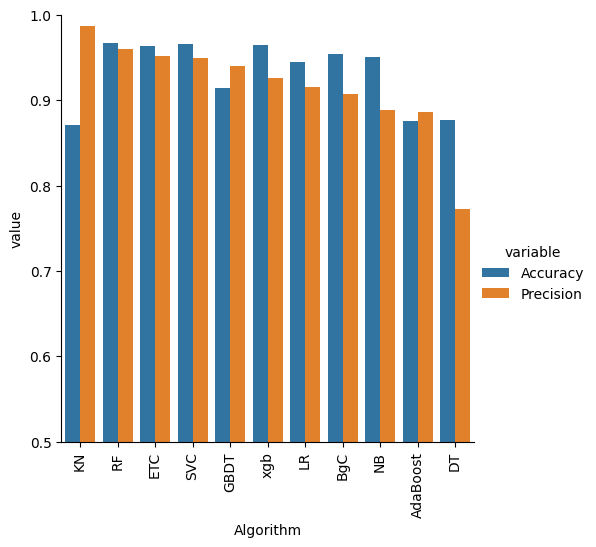

In [67]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df.melt(id_vars = 'Algorithm'), kind = 'bar', height = 5)
plt.ylim(0.5, 1)
plt.xticks(rotation = 90)
plt.show()

In [68]:
# Model improve
# 1. Chane the max_features parameter of Tfidf

In [69]:
tem_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_max_ft_300' : accuracy_scores, 'Precision_max_ft_300' : precision_scores}).sort_values('Precision_max_ft_300', ascending = False)

In [71]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(rfc, open('model.pkl', 'wb'))